In [37]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score


In [3]:
iris=pd.read_csv('../datasets/Iris.csv')#convert csv file to dataframe

In [4]:
#EDA

In [5]:
type(iris)

pandas.core.frame.DataFrame

In [6]:
iris.shape

(150, 6)

In [9]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris.drop(["Id"],axis=1,inplace=True)

In [10]:
#visulization dataset 

In [20]:
# sns.FacetGrid(data=iris, hue="Species", height=5).map(
#     plt.scatter, "SepalLengthCm", "SepalWidthCm"
# ).add_legend()  
# plt.show()


In [21]:
#one hot encoding pd.getdummies
#label encoding 
    # 1. find and replace method
    # 2. label encoding

In [22]:
iris["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [23]:
labels = {
    "Iris-setosa":0,
    'Iris-versicolor':1,
    "Iris-virginica":2


    }


In [25]:
iris["Species"].replace(labels,inplace=True)

C:\Users\MUHAMMAD REHAN AFZAL\AppData\Local\Temp\ipykernel_2756\3659948575.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  iris["Species"].replace(labels,inplace=True)


In [27]:
iris.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [29]:
#extract featurs and targets
X=iris.iloc[:,:-1].values
y=iris.iloc[:,-1].values

In [31]:
#cross validation
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

In [33]:
#model develop
model=KNeighborsClassifier()#load the model 

In [34]:
#model train
model.fit(X_train,y_train)

KNeighborsClassifier()

In [35]:
#model prediction
y_pred=model.predict(X_test)

In [38]:
#model evaluation
accuracy_score(y_test,y_pred)

1.0

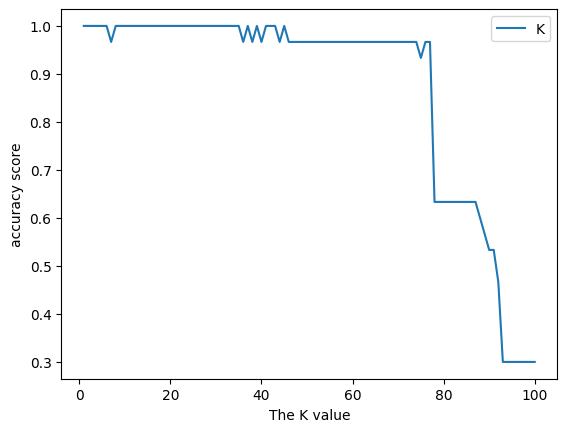

In [41]:
k_range = range(1, 101)
scores = []
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score=accuracy_score(y_test, y_pred)
    scores.append(score)



plt.plot(k_range,scores)
plt.xlabel("The K value")
plt.ylabel("accuracy score")
plt.legend("K vs Accuracy")
plt.show()